# Deviations from Normality
#### If mean is smaller than the median, then the skewness is negative

In [76]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import edhec_risk_kit as erk

hfi = erk.get_hfi_returns()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
hfi.head()

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
1997-01,0.0119,0.0393,0.0178,0.0791,0.0189,0.0213,0.0191,0.0573,0.0281,0.0150,0.0180,-0.0166,0.0317
1997-02,0.0123,0.0298,0.0122,0.0525,0.0101,0.0084,0.0122,0.0175,-0.0006,0.0034,0.0118,0.0426,0.0106
1997-03,0.0078,-0.0021,-0.0012,-0.0120,0.0016,-0.0023,0.0109,-0.0119,-0.0084,0.0060,0.0010,0.0778,-0.0077
1997-04,0.0086,-0.0170,0.0030,0.0119,0.0119,-0.0005,0.0130,0.0172,0.0084,-0.0001,0.0122,-0.0129,0.0009
1997-05,0.0156,-0.0015,0.0233,0.0315,0.0189,0.0346,0.0118,0.0108,0.0394,0.0197,0.0173,-0.0737,0.0275


## Skewness, Kurtosis
$S(R) = \frac{E[(R - E(R))^3]}{\sigma^3 _R}$

In [56]:
def skewness(r):
    """
    Alternative to scipy.stats.skew()
    Computes the skewness of the supplied Series or DataFrame
    Returns a float or a Series
    """
    deviation_r = r-r.mean()
    sigma_r = r.std(ddof=0) #
    exp = (deviation_r**3).mean()
    return exp/sigma_r**3

In [41]:
erk.skewness(hfi).sort_values()

Fixed Income Arbitrage   -3.940320
Convertible Arbitrage    -2.639592
Equity Market Neutral    -2.124435
Relative Value           -1.815470
Event Driven             -1.409154
Merger Arbitrage         -1.320083
Distressed Securities    -1.300842
Emerging Markets         -1.167067
Long/Short Equity        -0.390227
Funds Of Funds           -0.361783
CTA Global                0.173699
Short Selling             0.767975
Global Macro              0.982922
dtype: float64

$S(R) = \frac{E[(R - E(R))^4]}{\sigma^4 _R}$

In [ ]:
def kurtosis(r):
    """
    Alternative to scipy.stats.kurtosis()
    Computes the kurtosis of the supplied Series or DataFrame
    Returns a float or a Series
    """
    deviation_r = r-r.mean()
    sigma_r = r.std(ddof=0)
    exp = (deviation_r**4).mean()
    return exp/sigma_r**4

In [46]:
erk.kurtosis(hfi).sort_values()

CTA Global                 2.952960
Long/Short Equity          4.523893
Global Macro               5.741679
Short Selling              6.117772
Funds Of Funds             7.070153
Distressed Securities      7.889983
Event Driven               8.035828
Merger Arbitrage           8.738950
Emerging Markets           9.250788
Relative Value            12.121208
Equity Market Neutral     17.218555
Convertible Arbitrage     23.280834
Fixed Income Arbitrage    29.842199
dtype: float64

## Jarque-Bra test of Fat Tails (non-normality)

- Perform the Jarque-Bera goodness of fit test on sample data.

- The Jarque-Bera test tests whether the sample data has the skewness and kurtosis matching a normal distribution.

- Note that this test only works for a large enough number of data samples (>2000) as the test statistic asymptotically has a Chi-squared distribution with 2 degrees of freedom.

### Returns:
- jb_value: the test statistic
- p-value for the hypothesis test

### Hypothesis: The data provided as skewness and kartosis that matches a normal distribution

In [27]:
normal_rets = np.random.normal(0,0.1,10000)
scipy.stats.jarque_bera(normal_rets)

(0.4284497107759977, 0.8071668687965324)

In [25]:
scipy.stats.jarque_bera(hfi.iloc[:,0])

(4812.703130094962, 0.0)

In [ ]:
def is_normal(r, level=0.01):
    """
    Applies the Jarque-Bera test to determine if a Series is normal or not.
    Test is applied at the 1% level by default.
    Returns True if the hypothesis of normality is accepted, False otherwise
    """
    import scipy.stats
    statistic, p_value = scipy.stats.jarque_bera(r)
    return p_value > level

In [44]:
hfi.aggregate(erk.is_normal, level=0.01)

Convertible Arbitrage     False
CTA Global                 True
Distressed Securities     False
Emerging Markets          False
Equity Market Neutral     False
Event Driven              False
Fixed Income Arbitrage    False
Global Macro              False
Long/Short Equity         False
Merger Arbitrage          False
Relative Value            False
Short Selling             False
Funds Of Funds            False
dtype: bool

In [30]:
ffme = erk.get_ffme_returns()
erk.skewness(ffme)

SmallCap    4.410739
LargeCap    0.233445
dtype: float64

In [45]:
print("very fat tails!")
erk.kurtosis(ffme)

very fat tails!


SmallCap    46.845008
LargeCap    10.694654
dtype: float64

In [32]:
ffme.aggregate(erk.is_normal)

SmallCap    False
LargeCap    False
dtype: bool

# Semi-deviation
- Semi Deviation is the volatility of the sub-sample of below average or below zero returns. 
- The resulting formula is a simple modification from the standard deviation, namely, only summing the returns below average or below zero. However, this does not taken into account the extreme downside, since this is only an average measure of the downside risk.

In [48]:
import pandas as pd
import edhec_risk_kit as erk
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [86]:
hfi = erk.get_hfi_returns()
hfi.head()

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
1997-01,0.0119,0.0393,0.0178,0.0791,0.0189,0.0213,0.0191,0.0573,0.0281,0.0150,0.0180,-0.0166,0.0317
1997-02,0.0123,0.0298,0.0122,0.0525,0.0101,0.0084,0.0122,0.0175,-0.0006,0.0034,0.0118,0.0426,0.0106
1997-03,0.0078,-0.0021,-0.0012,-0.0120,0.0016,-0.0023,0.0109,-0.0119,-0.0084,0.0060,0.0010,0.0778,-0.0077
1997-04,0.0086,-0.0170,0.0030,0.0119,0.0119,-0.0005,0.0130,0.0172,0.0084,-0.0001,0.0122,-0.0129,0.0009
1997-05,0.0156,-0.0015,0.0233,0.0315,0.0189,0.0346,0.0118,0.0108,0.0394,0.0197,0.0173,-0.0737,0.0275


In [58]:
def semideviation(r):
    """
    Returns the semideviation aka negative semideviation of r
    r must be a Series or a DataFrame
    """
    is_negative = r<0
    return r[is_negative].std(ddof=0)

In [59]:
erk.semideviation(hfi)

Convertible Arbitrage     0.019540
CTA Global                0.012443
Distressed Securities     0.015185
Emerging Markets          0.028039
Equity Market Neutral     0.009566
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Global Macro              0.006579
Long/Short Equity         0.014051
Merger Arbitrage          0.008875
Relative Value            0.012244
Short Selling             0.027283
Funds Of Funds            0.012122
dtype: float64

# Var and CVaR
In an attempt to capture the extreme downside risk, we introduct VaR. Which represents the maximum "expected" loss over a given time period.

Value at risk (VaR) definition: Maximum potential loss threshold at a specified confidence level over a time period.

- Historic VaR
- Parametric VaR - Gaussian
- Modified Cornish-Fisher VaR

## Historical Var

In [71]:
def var_historic(r, level=5):
    """
    VaR Historic
    """
    if isinstance(r, pd.DataFrame):
        return r.aggregate(var_historic, level=level)
    elif isinstance(r, pd.Series):
        return -np.percentile(r, level)
    else:
        raise TypeError("Expected r to be Series or Data")

In [73]:
erk.var_historic(hfi)

Convertible Arbitrage     0.01576
CTA Global                0.03169
Distressed Securities     0.01966
Emerging Markets          0.04247
Equity Market Neutral     0.00814
Event Driven              0.02535
Fixed Income Arbitrage    0.00787
Global Macro              0.01499
Long/Short Equity         0.02598
Merger Arbitrage          0.01047
Relative Value            0.01174
Short Selling             0.06783
Funds Of Funds            0.02047
dtype: float64

## Parametric Var - Gaussian and Cornish Fisher Var
VaR = -(Z*volativity + mean)

In [65]:
from scipy.stats import norm

# inputs a percentile and returns its standard deviation or Z score from the mean
z=norm.ppf(0.05)
z

-1.6448536269514729

In [66]:
# The Z score of 0.05 is the independent variable that gives 5% when integrated from -infinity to Z
norm.cdf(z)

0.049999999999999975

In [68]:
-(hfi.mean() + z*hfi.std(ddof=0))

Convertible Arbitrage     0.021691
CTA Global                0.034235
Distressed Securities     0.021032
Emerging Markets          0.047164
Equity Market Neutral     0.008850
Event Driven              0.021144
Fixed Income Arbitrage    0.014579
Global Macro              0.018766
Long/Short Equity         0.026397
Merger Arbitrage          0.010435
Relative Value            0.013061
Short Selling             0.080086
Funds Of Funds            0.021292
dtype: float64

In [93]:
erk.var_gaussian(hfi)

Convertible Arbitrage     0.021691
CTA Global                0.034235
Distressed Securities     0.021032
Emerging Markets          0.047164
Equity Market Neutral     0.008850
Event Driven              0.021144
Fixed Income Arbitrage    0.014579
Global Macro              0.018766
Long/Short Equity         0.026397
Merger Arbitrage          0.010435
Relative Value            0.013061
Short Selling             0.080086
Funds Of Funds            0.021292
dtype: float64

In [69]:
from scipy.stats import norm 
def var_gaussian(r, level=5, modified=False):
    """
    Returns the parametric Gaussian VaR of a Series or DataFrame
    """
    z = norm.ppf(level/100)
    if modified == True:
        # Cornish Fisher expansion
        # modify the Z score based on observed skewness and kurtosis
        s = skewness(r)
        k = kurtosis(r)
        z1 = (z**2 - 1)*s/6
        z2 = (z**3 - 3*z)*(k-3)/24
        z3 = -(2*z**3 - 5*z)*(s**2)/36
        z = z + z1 + z2 + z3
    
    return -(z*r.std(ddof=0)+r.mean())

In [78]:
erk.var_gaussian(hfi, level=5, modified=True)

Convertible Arbitrage     0.025166
CTA Global                0.033094
Distressed Securities     0.025102
Emerging Markets          0.053011
Equity Market Neutral     0.010734
Event Driven              0.025516
Fixed Income Arbitrage    0.017881
Global Macro              0.013581
Long/Short Equity         0.027935
Merger Arbitrage          0.012612
Relative Value            0.016157
Short Selling             0.066157
Funds Of Funds            0.021576
dtype: float64

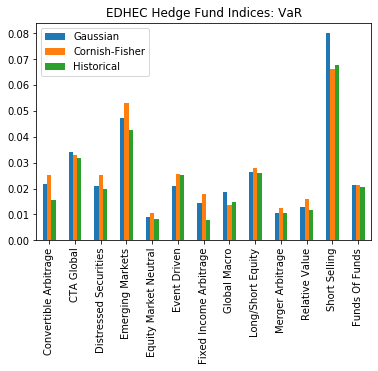

In [118]:
var_list = [erk.var_gaussian(hfi), erk.var_gaussian(hfi, modified=True), erk.var_historic(hfi)]
comparison = pd.concat(var_list, axis=1)
comparison.columns = ["Gaussian", "Cornish-Fisher", "Historical"]
comparison.plot.bar(title="EDHEC Hedge Fund Indices: VaR")

We can see that in the majority of the cases, Cornish-Fisher gives a higher VaR than Gaussian and historical calculations. 

However, in some cases, Cornish-Fisher infact gave a lowe VaR

## Conditional VAR
What happens for cases below the confidence ratio or Value at risk?

Then we need to consider the average loss beyond VaR.

$$CVaR = -E(R|R\leqslant-VaR) = \frac{-\int_{\infty}^{-VaR}x \cdot f_R(x)dx}{F_R(-VaR)}$$

Interpretation for CVAR at 5%
- If the 5% worst case happens, then it is the average loss (value ar risk) over a specified period

In [140]:
def cvar_historic(r, level=5):
    """
    Computes the conditional VaR of Series or Data Frame
    """
    # 1) find var_historic
    # 2) filter returns in r below var_historic
    # 3) find its mean
    
    if isinstance(r, pd.DataFrame):
        return r.aggregate(cvar_historic, level=level)
    elif isinstance(r, pd.Series): 
        r_below = r[r<=-var_historic(r, level)]
        return -r_below.mean()
    else:
        raise TypeError("Expected r to be a series or DataFrame")

In [142]:
erk.cvar_historic(hfi)

Convertible Arbitrage     0.036550
CTA Global                0.041264
Distressed Securities     0.036429
Emerging Markets          0.072364
Equity Market Neutral     0.016879
Event Driven              0.038336
Fixed Income Arbitrage    0.028257
Global Macro              0.020629
Long/Short Equity         0.041943
Merger Arbitrage          0.019143
Relative Value            0.024650
Short Selling             0.096821
Funds Of Funds            0.033207
dtype: float64

In [79]:
def cvar_gaussian(r, level=5, modified=True):
    """
    Computes the conditional VaR of Series or Data Frame
    """
    # 1) find var_historic
    # 2) filter returns in r below var_historic
    # 3) find its mean
    
    if isinstance(r, pd.DataFrame):
        return r.aggregate(cvar_gaussian, level=level, modified=modified)
    elif isinstance(r, pd.Series): 
        r_below = r[r<=-var_gaussian(r, level, modified)]
        return -r_below.mean()
    else:
        raise TypeError("Expected r to be a series or DataFrame")

In [82]:
erk.cvar_gaussian(hfi)

Convertible Arbitrage     0.058200
CTA Global                0.042000
Distressed Securities     0.055600
Emerging Markets          0.092488
Equity Market Neutral     0.021044
Event Driven              0.039331
Fixed Income Arbitrage    0.052500
Global Macro              0.019244
Long/Short Equity         0.044558
Merger Arbitrage          0.023400
Relative Value            0.029310
Short Selling             0.093075
Funds Of Funds            0.034185
dtype: float64

# Drawdown
1. compute a wealth index
2. compute previous peaks
3. compute drawndown - which is the wealth value as a percentage of the previous peak

In [84]:
import numpy as np
import pandas as pd
import edhec_risk_kit as erk
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [97]:
def drawdown(return_series: pd.Series):
    """
    Takes a times series of asset returns
    Computes and returns a DataFrame that contains:
    the wealth index
    the previous peaks
    drawdowns
    """
    wealth_index = 1000*return_series.cumprod()
    prev_peaks = wealth_index.cummax()
    drawdown = (wealth_index-prev_peaks)/prev_peaks
    
    return pd.DataFrame({"wealth_index": wealth_index,
                         "prev_peaks": prev_peaks,
                         "drawdown": drawdown})

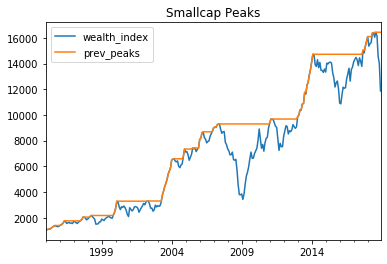

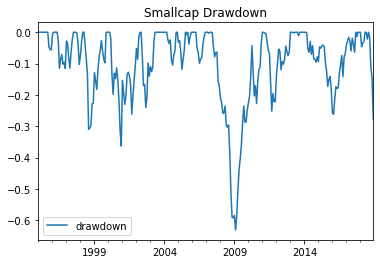

In [114]:
rets = erk.get_ffme_returns()
rets = 1+rets

drawdown_data = drawdown(rets.loc["1995":, "SmallCap"])

drawdown_data[["wealth_index","prev_peaks"]].plot(title="Smallcap Peaks")
drawdown_data[["drawdown"]].plot(title="Smallcap Drawdown")
